In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [5]:
data = pd.read_csv("POS_vordlus.csv")

In [6]:
data

,Mudel,Train_kadu,Val_kadu,Precision,Recall,F1,Accuracy,Epohh
0,100K,0.541,0.364,0.870,0.867,0.867,0.867,1
1,100K,0.286,0.294,0.895,0.894,0.894,0.894,2
2,100K,0.203,0.278,0.904,0.903,0.903,0.903,3
3,100K,NaN,NaN,0.911,0.910,0.910,0.910,test
4,300K,0.576,0.378,0.866,0.863,0.863,0.863,1
5,300K,0.306,0.310,0.890,0.889,0.889,0.889,2
6,300K,0.235,0.280,0.903,0.901,0.902,0.901,3
7,300K,NaN,NaN,0.905,0.904,0.905,0.904,test
8,500K,0.619,0.393,0.860,0.857,0.857,0.857,1
9,500K,0.323,0.301,0.891,0.890,0.890,0.890,2


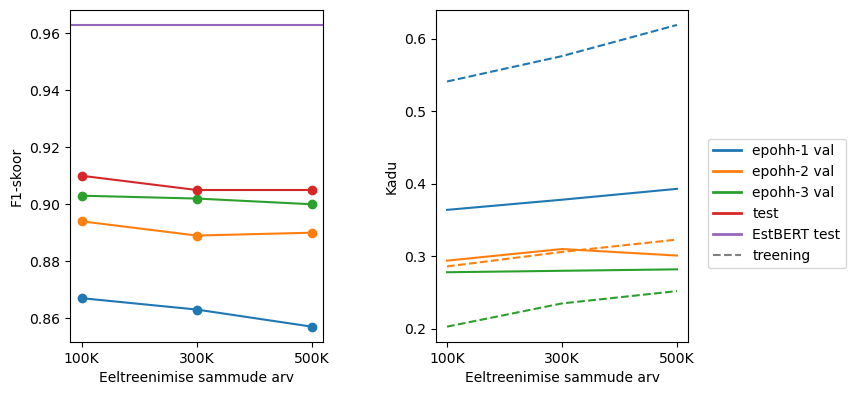

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'gray']

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.F1, label = epohh, marker='o', c = colors[i])

estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "test")]
ax1.axhline(y=float(estbert_data.F1), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="F1-skoor")

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Train_kadu, label = epohh, linestyle = "--", c = colors[i])
    ax2.plot(epohh_data.Mudel, epohh_data.Val_kadu, label = epohh, c = colors[i])
    
#estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "epohh-3")]
#ax2.axhline(y=float(estbert_data.Val_kadu), color='tab:purple', label = "EstBERT")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Kadu")


lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['epohh-1 val', 'epohh-2 val', 'epohh-3 val', 'test', 'EstBERT test', 'treening']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2))

#plt.savefig('Rubric_kohandamine.JPG')
plt.show()

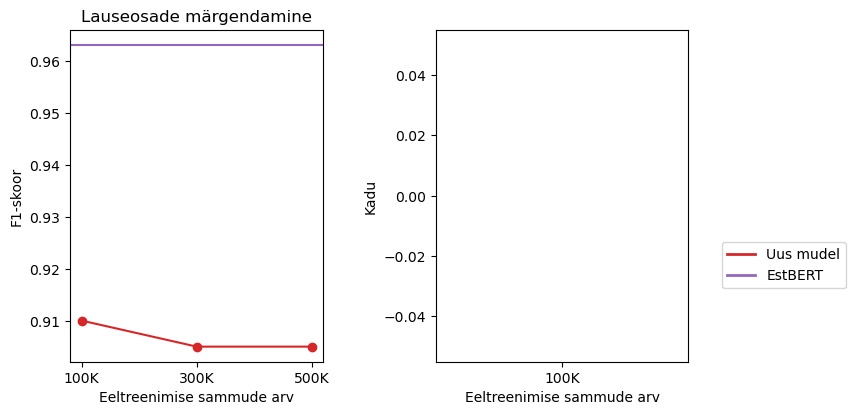

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:red', 'tab:purple']

data2 = data[data.Epohh == "test"]

for i, epohh in enumerate(data2.Epohh.unique()):
    epohh_data = data2[data2.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.F1, label = epohh, marker='o', c = colors[i])

estbert_data = data2[(data2.Mudel == "EstBERT") & (data2.Epohh == "test")]
ax1.axhline(y=float(estbert_data.F1), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="F1-skoor")
ax1.set_title("Lauseosade märgendamine")

for i, epohh in enumerate(data2.Epohh.unique()):
    epohh_data = data2[data2.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Train_kadu, label = epohh, linestyle = "--", c = colors[i])
    ax2.plot(epohh_data.Mudel, epohh_data.Val_kadu, label = epohh, c = colors[i])
    
#estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "epohh-3")]
#ax2.axhline(y=float(estbert_data.Val_kadu), color='tab:purple', label = "EstBERT")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Kadu")


lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['Uus mudel', 'EstBERT']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2))

#plt.savefig('Rubric_kohandamine.JPG')
plt.show()